In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import scipy
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import warnings
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
#from xgboost import XGBRegressor
from xgboost import XGBClassifier
#from sklearn.datasets import load_dig
from sklearn.feature_selection import SelectKBest, chi2
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
from warnings import filterwarnings
filterwarnings('ignore')

In [32]:
# Path of file to read
data_path = 'CollegeBasketballPlayers2009-2021.csv'
total_ball_data = pd.read_csv(data_path, low_memory = False)

Prezentacja danych

In [3]:
total_ball_data #61061

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.39380,2.5,2009,2,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.3210,108.5270,0.893017,49.964400,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.06600,3.4,2009,3,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0780,104.0170,1.880030,111.929000,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.10700,1.7,2009,5,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.5560,102.1540,2.763870,115.021000,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.20860,2.0,2009,8,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8580,106.5560,1.218710,84.169800,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.85540,3.8,2009,9,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0520,100.7240,1.992790,128.028000,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,51.1,0.0,0,0,0.000,0,1,0.000,0,0,0.000,0.0,20.3,0.0,Fr,8-Jun,12,-0.117667,62.64930,0.0,2021,74229,all,93.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.1939,61.6342,0.341560,1.324650,1.175740,-5.172880,6.348620,18.161500,1.5000,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,50.3,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,Fr,11-Jun,33,-0.859158,19.23020,0.0,2021,74230,all,NaN,0.000000,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,NaN,119.3690,124.7220,0.032976,1.432110,-11.362500,-7.448800,-3.913670,-12.236100,3.7500,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,NaN,24,-0.326039,-8.70362,0.0,2021,74231,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.6320,108.0530,0.066632,0.098523,-4.939260,-4.485900,-0.453364,-4.651630,1.0000,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,NaN,30,-

In [5]:
total_ball_data.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')

Zmiana zmiennej objasnianej 'pick' na zmienną binarną

In [33]:
#Przerabiam dane - zmienną objasniana pick przerabiam na binarną
total_ball_data["pick"] = total_ball_data["pick"].replace(np.nan, 0)
for i in range(len(total_ball_data)):
    if total_ball_data["pick"][i] >=1:
        total_ball_data["pick"][i]=1

total_ball_data['pick'] = total_ball_data['pick'].astype(int)

In [34]:
total_ball_data = total_ball_data.drop(['ht', 'yr', 'num', 'pid', 'type', 'Rec Rank', 'gbpm', 'ogbpm', 'dgbpm', 'Unnamed: 64', 'Unnamed: 65'], axis=1)


Weryfikacja brakujących danych

In [8]:
total_ball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61061 entries, 0 to 61060
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      61061 non-null  object 
 1   team                             61061 non-null  object 
 2   conf                             61061 non-null  object 
 3   GP                               61061 non-null  int64  
 4   Min_per                          61061 non-null  float64
 5   Ortg                             61061 non-null  float64
 6   usg                              61061 non-null  float64
 7   eFG                              61061 non-null  float64
 8   TS_per                           61061 non-null  float64
 9   ORB_per                          61061 non-null  float64
 10  DRB_per                          61061 non-null  float64
 11  AST_per                          61061 non-null  float64
 12  TO_per            

In [35]:
#filtruje przez te 3 kolumny zeby nie stracic zbyt duzej liczby zmiennych objasniajacych 
# w ten sposob tracę 9 a nie 34 zmiennych objasniajacych
total_ball_data =total_ball_data[total_ball_data['drtg'].notna()]
total_ball_data =total_ball_data[total_ball_data['ast'].notna()]
total_ball_data =total_ball_data[total_ball_data['dunksmade'].notna()]

total_ball_data['rimmade/(rimmade+rimmiss)'].fillna(0, inplace=True)
total_ball_data['midmade/(midmade+midmiss)'].fillna(0, inplace=True)
total_ball_data['dunksmade/(dunksmade+dunksmiss)'].fillna(0, inplace=True)
total_ball_data['ast/tov'].fillna(0, inplace=True)

In [27]:
null_columns = total_ball_data.columns[total_ball_data.isnull().any()]

# count number of columns with NaN values
num_null_columns = len(null_columns)

# print names of columns with NaN values
print("Columns with NaN values: ", list(null_columns))
print("Number of columns with NaN values: ", num_null_columns)

Columns with NaN values:  []
Number of columns with NaN values:  0


In [36]:
total_ball_data = total_ball_data._get_numeric_data()

Na danych do 2020 roku włącznie uczę model. Na danych z 2021 dokonam weryfikacji modelu. 

In [37]:
ball_data = total_ball_data.loc[total_ball_data['year'] < 2021]
ball_data = ball_data.drop(['year'], axis=1)
ball_data_2021 = total_ball_data.loc[total_ball_data['year'] == 2021]
ball_data_2021 = ball_data_2021.drop(['year'], axis=1)
total_ball_data_year = total_ball_data
total_ball_data = total_ball_data.drop(['year'], axis=1)
ball_data

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,mp,oreb,dreb,treb,ast,stl,blk,pts
4589,32,64.0,108.3,18.1,53.0,53.33,2.3,5.9,14.6,14.1,33,62,0.532,70,134,0.522,36,100,0.360,0.9,1.4,26.5,1.915280,104.7920,2.7,1.999909,48.0,75.0,22.0,59.0,0.6400,0.3729,6.0,7.0,0.8571,0,100.8750,98.5761,2.636630,124.827000,2.282520,2.426980,-0.144461,27.3125,0.4688,1.3750,1.8438,2.1875,0.5938,0.2188,8.7812
4590,11,1.0,121.1,16.8,75.0,75.00,0.0,0.0,15.8,24.8,0,0,0.000,0,1,0.000,2,3,0.667,0.0,0.0,0.0,0.151246,116.4680,8.0,1.000000,0.0,0.0,0.0,1.0,0.0000,0.0000,0.0,0.0,0.0000,0,102.8780,101.9380,0.116247,1.586250,-3.890510,0.869061,-4.759570,1.3636,0.0000,0.0000,0.0000,0.0909,0.0000,0.0000,0.5455
4591,27,81.8,99.8,27.7,49.9,53.76,6.9,17.6,15.6,18.6,123,187,0.658,126,261,0.483,33,91,0.363,1.4,1.4,53.1,2.701770,108.3130,4.3,0.773810,82.0,134.0,44.0,127.0,0.6119,0.3465,3.0,4.0,0.7500,0,106.3010,110.6310,1.801420,168.428000,-0.441037,1.107340,-1.548380,32.7037,2.1481,4.9259,7.0741,2.4074,0.8148,0.4815,17.5556
4594,35,76.2,118.1,16.4,58.8,60.93,4.7,11.5,12.3,15.1,73,107,0.682,65,136,0.478,59,125,0.472,1.4,3.1,41.0,2.872460,111.6740,3.5,1.340383,47.0,78.0,19.0,58.0,0.6026,0.3276,13.0,15.0,0.8667,0,95.9093,98.0859,3.004560,215.857000,6.077490,3.665330,2.412160,30.6857,1.3429,3.2286,4.5714,1.8000,1.6571,0.4000,10.8571
4595,29,9.5,60.7,6.9,8.3,14.93,3.2,13.9,7.7,6.1,3,10,0.300,1,10,0.100,0,2,0.000,0.8,1.3,83.3,-0.591030,47.4843,3.9,5.997102,1.0,7.0,0.0,3.0,0.1429,0.0000,0.0,0.0,0.0000,0,99.0118,101.2860,0.402609,23.565700,-4.128490,-4.707080,0.578588,4.6207,0.1379,0.5862,0.7241,0.2069,0.1034,0.0345,0.1724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56084,3,0.2,0.0,37.9,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,2,0.000,0,1,0.000,0.0,0.0,0.0,-0.338843,-12.3082,0.0,0.000000,0.0,0.0,0.0,2.0,0.0000,0.0000,0.0,0.0,0.0000,0,111.4770,114.6700,0.043969,0.305793,-40.645800,-27.452900,-13.192900,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
56085,2,0.2,64.6,20.0,30.0,30.00,0.0,0.0,0.0,0.0,0,0,0.000,0,1,0.000,1,4,0.250,0.0,0.0,0.0,-0.084826,60.8956,0.0,0.000000,0.0,0.0,0.0,1.0,0.0000,0.0000,0.0,0.0,0.0000,0,108.2920,125.1140,0.007729,0.198895,-12.639400,-5.302850,-7.336550,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.5000
56086,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,-0.414715,-34.1733,0.0,0.000000,0.0,0.0,0.0,1.0,0.0000,0.0000,0.0,0.0,0.0000,0,119.4230,114.0410,0.046150,0.088249,-55.565300,-38.138100,-17.427300,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
56087,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,0.0,0.0,2,2,1.000,1,1,1.000,0,0,0.000,0.0,0.0,200.0,0.998677,229.2430,0.0,0.000000,1.0,1.0,0.0,0.0,1.0000,0.0000,0.0,0.0,0.0000,0,115.3500,118.0420,0.064534,0.201875,12.155000,22.404000,-10.249100,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000


Dane niezbalansowane

In [10]:
k = int(total_ball_data['pick'].sum())
print('Players drafted:',k)
n = len(total_ball_data)
z=k/n*100
print('Total number of players',n)
print("% of players drafted: {:,.2f}%".format(z))

Players drafted: 1297
Total number of players 54727
% of players drafted: 2.37%


Korelacje

In [10]:
total_ball_data.corr()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,mp,oreb,dreb,treb,ast,stl,blk,pts
GP,1.000000,0.751069,0.355437,0.073470,0.310214,0.320282,-0.017939,0.031242,0.180772,-0.042377,0.571380,0.596696,0.525710,0.600825,0.621964,0.326413,0.461149,0.481468,0.252690,0.034683,0.044941,-0.018645,0.463972,0.407910,-0.088530,0.278701,0.572424,0.593730,0.511430,0.551464,0.403071,0.336084,0.325629,0.331309,0.403856,0.142576,-0.080822,-0.137138,0.629877,0.775468,0.467818,0.436342,0.303216,0.643289,0.411478,0.526118,0.517375,0.412032,0.469158,0.292220,0.527464
Min_per,0.751069,1.000000,0.359247,0.301165,0.284018,0.316555,-0.067214,0.033468,0.346448,-0.134719,0.797204,0.802681,0.518890,0.786238,0.822429,0.266181,0.670433,0.692164,0.338164,-0.015877,0.089454,-0.047270,0.701424,0.457046,-0.190586,0.323716,0.723689,0.760232,0.712487,0.755712,0.322585,0.317362,0.340295,0.344697,0.360176,0.158776,-0.027628,-0.053495,0.839877,0.950932,0.448571,0.485825,0.209199,0.958393,0.495815,0.770477,0.720173,0.701242,0.744365,0.315642,0.863632
Ortg,0.355437,0.359247,1.000000,-0.009215,0.782199,0.862469,0.066625,0.043990,0.158813,-0.384819,0.309793,0.302142,0.400815,0.319038,0.294771,0.533783,0.283677,0.260506,0.390258,0.023402,0.018749,0.045309,0.531771,0.954529,-0.064939,0.235649,0.312126,0.296189,0.257534,0.245576,0.435189,0.346683,0.196314,0.195421,0.223733,0.092821,-0.051253,-0.083052,0.352922,0.363227,0.624693,0.786858,0.157982,0.356031,0.275934,0.317049,0.321603,0.220941,0.249145,0.181607,0.380883
usg,0.073470,0.301165,-0.009215,1.000000,0.002748,0.036490,0.068118,0.097286,0.292888,-0.006043,0.489655,0.487237,0.193711,0.470889,0.496105,0.038432,0.252945,0.273954,0.112709,-0.009227,0.117129,0.061645,0.427269,0.229235,-0.052066,-0.049297,0.420220,0.444413,0.448502,0.470258,0.066783,0.092213,0.175326,0.177351,0.156679,0.117114,-0.088568,-0.078685,0.312796,0.315321,-0.034645,0.029170,-0.096802,0.327486,0.234650,0.340587,0.323785,0.318835,0.327205,0.106540,0.536537
eFG,0.310214,0.284018,0.782199,0.002748,1.000000,0.920523,0.025585,0.059649,0.043548,-0.064261,0.206946,0.217921,0.211303,0.271072,0.230578,0.674349,0.200206,0.168877,0.409174,0.051329,-0.006389,0.017930,0.398789,0.747088,-0.018827,0.082805,0.281836,0.253656,0.189957,0.168386,0.531395,0.396970,0.206326,0.205056,0.243212,0.065385,-0.047953,-0.065046,0.277172,0.289356,0.497143,0.587800,0.172155,0.282773,0.242358,0.277116,0.281510,0.127829,0.177191,0.203709,0.303271
TS_per,0.320282,0.316555,0.862469,0.036490,0.920523,1.000000,0.011372,0.053441,0.073939,-0.060650,0.275709,0.273126,0.382449,0.293662,0.260299,0.607561,0.226451,0.196952,0.413450,0.034341,0.008505,0.091751,0.447636,0.832215,-0.031669,0.099311,0.297799,0.276180,0.218740,0.201026,0.483236,0.372643,0.196764,0.195707,0.230403,0.073166,-0.044206,-0.062697,0.303999,0.318505,0.524918,0.634571,0.164927,0.316259,0.238799,0.295405,0.293222,0.171081,0.212666,0.187745,0.345102
ORB_per,-0.017939,-0.067214,0.066625,0.068118,0.025585,0.011372,1.000000,0.608785,-0.135849,-0.031447,-0.018514,0.009621,-0.077763,0.065203,0.038985,0.076916,-0.179709,-0.186653,-0.170223,0.686386,0.178918,0.087245,0.014638,0.082990,0.701805,-0.172028,0.096318,0.076389,-0.003208,-0.007536,0.067844,0.000432,0.142226,0.143304,0.127463,0.014956,-0.557946,-0.506487,-0.017040,-0.018888,0.368162,0.196251,0.416547,-0.078360,0.285726,0.070781,0.150509,-0.155311,-0.094333,0.173048,-0.048781
DRB_per,0.031242,0.033468,0.043990,0.097286,0.059649,0.053441,0.608785,1.000000,-0.086348,-0.017521,0.069085,0.095274,-0.017870,0.154745,0.129327,0.100270,-0.104336,-0.107651,-0.097372,0.678184,0.148889,0.071536,0.079680,0.070997,0.543928,-0.137718,0.175996,0.156254,0.082044,0.079017,0.093183

In [11]:
def CorrMtx(df, dropDuplicates = True):
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool_)
        mask[np.triu_indices_from(mask)] = True
    # Set background color / chart style
    sn.set_style(style = 'white')
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Add diverging colormap from red to blue
    cmap = sn.diverging_palette(250, 10, as_cmap=True)
    sn.set(font_scale=0.8)
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sn.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sn.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

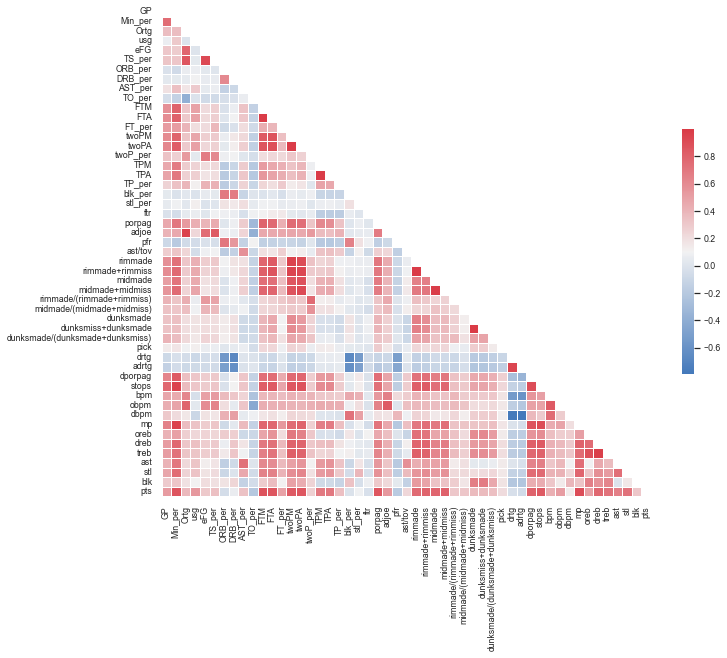

In [13]:
CorrMtx(total_ball_data.corr(), dropDuplicates = True)

In [38]:
corr = total_ball_data.corr().stack()

# filter for correlations >= 0.8
high_corr = corr[(corr >= 0.8) & (corr < 1)]

# print results
print(high_corr)

Min_per  FTA                0.802681
         twoPA              0.822429
         dporpag            0.839877
         stops              0.950932
         mp                 0.958393
                              ...   
pts      porpag             0.858170
         midmade+midmiss    0.803330
         dporpag            0.800035
         stops              0.842864
         mp                 0.900791
Length: 116, dtype: float64


In [13]:
# Creates a target object for the pick and calls it y
y = ball_data.pick
#X = ball_data.loc[:,ball_data.columns!='pick']
# Creates X by using specific statistics
#features = ['Min_per', 'ftr', 'pts', 'ORB_per', 'DRB_per', 'blk_per', 'stl_per', 'dporpag', 'porpag', 'AST_per', 'TO_per', 'FT_per']

#colnames=list(X)
#display(X)
#X = ball_data[features]

# Split into validation and training data

corr = total_ball_data.corr()

for i in np.arange(0.75, 1.01, 0.05):

    print("threshold: {:,.2f}\n".format(i))
    # Filter for correlations >= 0.8
    high_corr = corr[(corr >= i) & (corr < 1)]

    # Get the columns to be removed
    columns_to_remove = high_corr.columns[high_corr.any()]
    # Drop the columns from the DataFrame
    df_filtered = ball_data.drop(columns_to_remove, axis=1)
    X = df_filtered.loc[:,df_filtered.columns!='pick']
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

    modelRF = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
    modelRF.fit(train_X, train_y)
    y_pred = modelRF.predict(val_X)
    f1 = f1_score(val_y, y_pred)
    print("Validation f1 score RF: {:,.3f}".format(f1))

    modelXGB = XGBClassifier(scale_pos_weight=(len(train_y) - sum(train_y)) / sum(train_y))
    modelXGB.fit(train_X, train_y)
    y_pred = modelXGB.predict(val_X)
    f1 = f1_score(val_y, y_pred)
    print("Validation f1 score XGB: {:,.3f}".format(f1))
   
    model = LogisticRegression(solver='newton-cg', class_weight='balanced')
    model.fit(train_X, train_y)
    pred_test = model.predict(val_X)
    f1_test = f1_score(val_y, pred_test)
    print("The f1 score for the testing data LR: {:,.3f}\n".format(f1_test))

    df_filtered_2021 = ball_data_2021.drop(columns_to_remove, axis=1)
    test_X_2021 = df_filtered_2021.loc[:,df_filtered_2021.columns!='pick']

    test_preds_2021 = modelRF.predict(test_X_2021)
    f1 = f1_score(df_filtered_2021.pick, test_preds_2021)
    print("2021 Validation f1 score RF: {:,.5f}".format(f1))

    test_preds_2021 = modelXGB.predict(test_X_2021)
    f1 = f1_score(df_filtered_2021.pick, test_preds_2021)
    print("2021 Validation f1 score XGB: {:,.5f}".format(f1))

    test_preds_2021 = model.predict(test_X_2021)
    f1 = f1_score(df_filtered_2021.pick, test_preds_2021)
    print("2021 The f1 score for the testing data LR: {:,.5f}\n\n".format(f1))



threshold: 0.75

Validation f1 score RF: 0.174
Validation f1 score XGB: 0.261
The f1 score for the testing data LR: 0.163

2021 Validation f1 score RF: 0.09298
2021 Validation f1 score XGB: 0.22222
2021 The f1 score for the testing data LR: 0.07897


threshold: 0.80

Validation f1 score RF: 0.216
Validation f1 score XGB: 0.361
The f1 score for the testing data LR: 0.215

2021 Validation f1 score RF: 0.13529
2021 Validation f1 score XGB: 0.36800
2021 The f1 score for the testing data LR: 0.13480


threshold: 0.85

Validation f1 score RF: 0.233
Validation f1 score XGB: 0.398
The f1 score for the testing data LR: 0.238

2021 Validation f1 score RF: 0.13260
2021 Validation f1 score XGB: 0.31206
2021 The f1 score for the testing data LR: 0.13861


threshold: 0.90

Validation f1 score RF: 0.231
Validation f1 score XGB: 0.414
The f1 score for the testing data LR: 0.240

2021 Validation f1 score RF: 0.13079
2021 Validation f1 score XGB: 0.37143
2021 The f1 score for the testing data LR: 0.1388

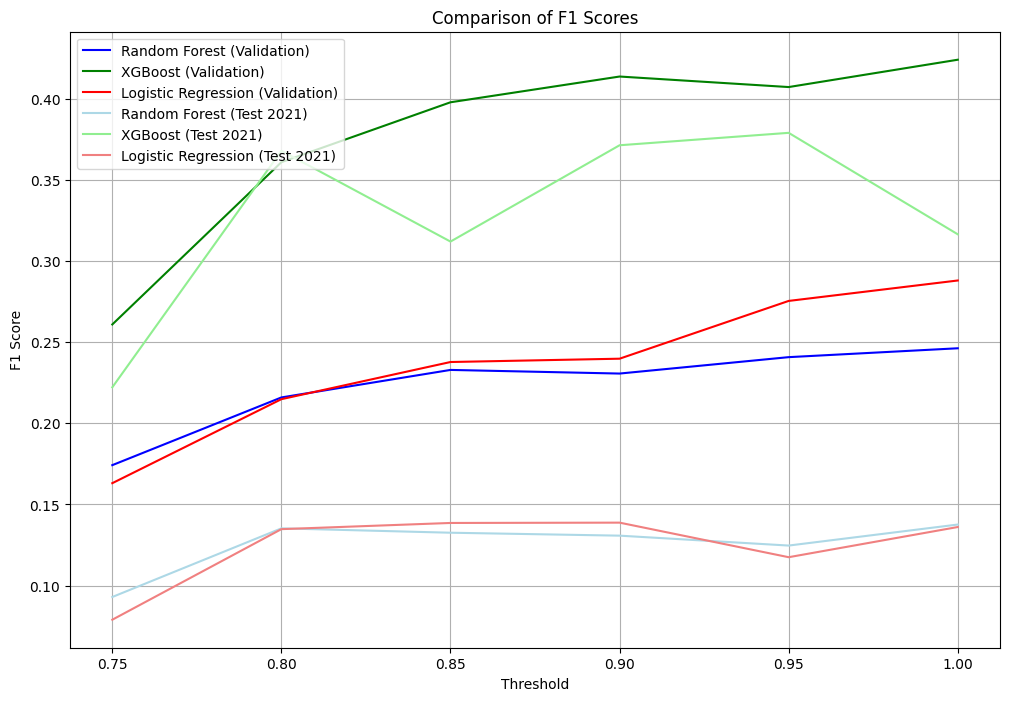

In [15]:
# F1 scores
val_rf_scores = []
val_xgb_scores = []
val_lr_scores = []
test_rf_scores = []
test_xgb_scores = []
test_lr_scores = []

corr = total_ball_data.corr()

for i in np.arange(0.75, 1.01, 0.05):
    # Filter for correlations >= 0.8
    high_corr = corr[(corr >= i) & (corr < 1)]
    # Get the columns to be removed
    columns_to_remove = high_corr.columns[high_corr.any()]
    # Drop the columns from the DataFrame
    df_filtered = ball_data.drop(columns_to_remove, axis=1)
    X = df_filtered.loc[:, df_filtered.columns != 'pick']
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

    # Train models
    modelRF = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
    modelRF.fit(train_X, train_y)
    modelXGB = XGBClassifier(scale_pos_weight=(len(train_y) - sum(train_y)) / sum(train_y))
    modelXGB.fit(train_X, train_y)
    modelLR = LogisticRegression(solver='newton-cg', class_weight='balanced')
    modelLR.fit(train_X, train_y)

    # Calculate F1 scores on validation set
    val_rf_scores.append(f1_score(val_y, modelRF.predict(val_X)))
    val_xgb_scores.append(f1_score(val_y, modelXGB.predict(val_X)))
    val_lr_scores.append(f1_score(val_y, modelLR.predict(val_X)))

    # Calculate F1 scores on test set (2021)
    df_filtered_2021 = ball_data_2021.drop(columns_to_remove, axis=1)
    test_X_2021 = df_filtered_2021.loc[:, df_filtered_2021.columns != 'pick']
    test_rf_scores.append(f1_score(df_filtered_2021.pick, modelRF.predict(test_X_2021)))
    test_xgb_scores.append(f1_score(df_filtered_2021.pick, modelXGB.predict(test_X_2021)))
    test_lr_scores.append(f1_score(df_filtered_2021.pick, modelLR.predict(test_X_2021)))

# Plotting
thresholds = np.arange(0.75, 1.01, 0.05)

plt.figure(figsize=(12, 8))
plt.plot(thresholds, val_rf_scores, label='Random Forest (Validation)', color='b')
plt.plot(thresholds, val_xgb_scores, label='XGBoost (Validation)', color='g')
plt.plot(thresholds, val_lr_scores, label='Logistic Regression (Validation)', color='r')
plt.plot(thresholds, test_rf_scores, label='Random Forest (Test 2021)', color='lightblue')
plt.plot(thresholds, test_xgb_scores, label='XGBoost (Test 2021)', color='lightgreen')
plt.plot(thresholds, test_lr_scores, label='Logistic Regression (Test 2021)', color='lightcoral')

plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
for i in np.arange(0.75, 1.01, 0.05):

    print("belka korelacji: {:,.2f}".format(i))
    # Filter for correlations >= 0.8
    high_corr = corr[(corr >= i) & (corr < 1)]

    # Get the columns to be removed
    columns_to_remove = high_corr.columns[high_corr.any()]
    # Drop the columns from the DataFrame
    df_filtered = ball_data.drop(columns_to_remove, axis=1)
    print(df_filtered.shape)
    print(df_filtered)


belka korelacji: 0.75
(50006, 17)
        usg  ORB_per  DRB_per  AST_per  TO_per  FT_per  TP_per  blk_per   
4589   18.1      2.3      5.9     14.6    14.1   0.532   0.360      0.9  \
4590   16.8      0.0      0.0     15.8    24.8   0.000   0.667      0.0   
4591   27.7      6.9     17.6     15.6    18.6   0.658   0.363      1.4   
4594   16.4      4.7     11.5     12.3    15.1   0.682   0.472      1.4   
4595    6.9      3.2     13.9      7.7     6.1   0.300   0.000      0.8   
...     ...      ...      ...      ...     ...     ...     ...      ...   
56084  37.9      0.0      0.0      0.0     0.0   0.000   0.000      0.0   
56085  20.0      0.0      0.0      0.0     0.0   0.000   0.250      0.0   
56086  48.9      0.0      0.0      0.0     0.0   0.000   0.000      0.0   
56087  35.9      0.0      0.0      0.0     0.0   1.000   0.000      0.0   
56089  20.0      0.0      0.0      0.0     0.0   0.000   1.000      0.0   

       stl_per    ftr  pfr   ast/tov  midmade/(midmade+midmiss)  

In [14]:
df_filtered

,GP,usg,ORB_per,DRB_per,AST_per,TO_per,FT_per,twoP_per,TP_per,blk_per,stl_per,ftr,pfr,ast/tov,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade/(dunksmade+dunksmiss),pick,dbpm,ast,stl,blk
4589,32,18.1,2.3,5.9,14.6,14.1,0.532,0.522,0.360,0.9,1.4,26.5,2.7,1.999909,0.6400,0.3729,0.8571,0,-0.144461,2.1875,0.5938,0.2188
4590,11,16.8,0.0,0.0,15.8,24.8,0.000,0.000,0.667,0.0,0.0,0.0,8.0,1.000000,0.0000,0.0000,0.0000,0,-4.759570,0.0909,0.0000,0.0000
4591,27,27.7,6.9,17.6,15.6,18.6,0.658,0.483,0.363,1.4,1.4,53.1,4.3,0.773810,0.6119,0.3465,0.7500,0,-1.548380,2.4074,0.8148,0.4815
4594,35,16.4,4.7,11.5,12.3,15.1,0.682,0.478,0.472,1.4,3.1,41.0,3.5,1.340383,0.6026,0.3276,0.8667,0,2.412160,1.8000,1.6571,0.4000
4595,29,6.9,3.2,13.9,7.7,6.1,0.300,0.100,0.000,0.8,1.3,83.3,3.9,5.997102,0.1429,0.0000,0.0000,0,0.578588,0.2069,0.1034,0.0345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61047,13,15.1,10.2,21.2,3.8,22.4,0.333,0.600,0.000,1.6,0.8,48.0,3.6,0.375041,0.6875,0.4444,1.0000,0,1.013980,0.2308,0.1538,0.1538
61048,7,14.7,0.0,0.0,17.4,28.0,0.000,0.667,0.500,0.0,6.2,40.0,5.7,1.000000,1.0000,0.0000,0.0000,0,-4.879850,0.2857,0.4286,0.0000
61050,2,32.2,0.0,0.0,0.0,59.7,0.000,0.000,0.000,0.0,0.0,0.0,13.3,0.000000,0.0000,0.0000,0.0000,0,-5.087270,0.0000,0.0000,0.0000
61051,2,29.9,19.8,18.8,0.0,63.8,0.500,0.000,0.000,0.0,0.0,0.0,13.3,0.000000,0.0000,0.0000,0.0000,0,-6.677080,0.0000,0.0000,0.0000


In [15]:
corr = df_filtered.corr().stack()

# filter for correlations >= 0.8
high_corr = corr[(corr >= 0.8) & (corr < 1)]

# print results
print(high_corr)

Series([], dtype: float64)


In [145]:
total_ball_data.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,pid,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,dunksmade,dunksmiss+dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 65
count,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.00000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000,54727.000000
mean,23.391799,38.274031,94.213112,18.541994,45.940170,49.111131,5.579407,12.803035,10.931027,20.045658,32.906299,47.028542,0.596212,41.586146,85.46118,0.440477,15.899647,46.297732,0.235988,1.896815,1.717485,38.008679,0.810896,91.840845,4.230491,2015.540848,35505.687613,27.382517,45.930692,14.102070,39.304712,3.740585,4.207174,103.305495,103.400938,1.477897,83.202783,-2.362447,-1.741745,-0.620702,-2.325085,17.406669,-1.909394,-0.415691,0.781781,1.959415,2.741196,1.104234,0.542658,0.289937,5.963273,5.584139
std,9.673158,27.722641,26.678415,5.659291,16.939139,15.773605,9.164117,9.631903,8.898464,10.290480,36.264951,48.669958,0.256710,43.040043,83.62283,0.184035,21.337712,57.322894,0.189103,5.781945,1.737545,36.436885,1.332132,26.985196,4.274274,3.454394,19459.447425,29.654491,46.830651,17.236956,43.609865,7.788055,8.542531,9.780664,10.614425,1.056102,63.970667,7.277912,4.955228,4.097934,7.731661,10.432483,5.806353,2.971295,0.732612,1.478397,2.086041,1.175347,0.465807,0.418454,4.924684,5.581991
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.792410,-39.021300,0.000000,2010.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-71.980000,-92.593500,-57.459400,-176.493000,0.000000,-104.966000,-71.527600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,11.300000,85.700000,14.800000,41.200000,44.870000,1.900000,8.700000,4.900000,14.900000,5.000000,8.000000,0.500000,6.000000,15.00000,0.385000,0.000000,2.000000,0.000000,0.100000,0.900000,20.100000,-0.132790,81.170600,2.800000,2013.000000,20062.000000,4.000000,8.000000,1.000000,6.000000,0.000000,0.000000,99.040400,98.042400,0.579765,22.896850,-5.203300,-3.859605,-2.266925,-5.158915,8.000000,-4.252105,-1.671115,0.250000,0.777800,1.105300,0.250000,0.176500,0.031200,1.782600,0.697774
50%,27.000000,37.200000,97.800000,18.200000,48.100000,51.210000,4.400000,12.100000,9.200000,19.100000,21.000000,32.000000,0.667000,28.000000,61.00000,0.466000,6.000000,20.000000,0.284000,0.900000,1.600000,33.100000,0.434119,95.452900,3.800000,2016.000000,34112.000000,18.000000,32.000000,8.000000,24.000000,0.000000,1.000000,103.598000,103.733000,1.312320,77.152900,-1.686780,-1.223480,-0.548842,-1.648290,17.281200,-1.471470,-0.286494,0.555600,1.705900,2.344800,0.714300,0.440000,0.142900,4.741900,4.884220
75%,31.000000,62.700000,107.300000,21.900000,53.600000,56.360000,8.100000,16.200000,15.100000,24.300000,50.000000,71.000000,0.760000,65.000000,133.50000,0.530000,25.000000,75.000000,0.360000,2.500000,2.200000,47.800000,1.533705,107.073500,5.200000,2019.000000,48174.500000,42.000000,71.000000,21.000000,59.000000,4.000000,4.000000,108.063500,109.140000,2.210330,133.765000,1.495650,1.080905,1.152410,1.471030,26.562500,1.055175,1.075945,1.121200,2.823500,3.896600,1.

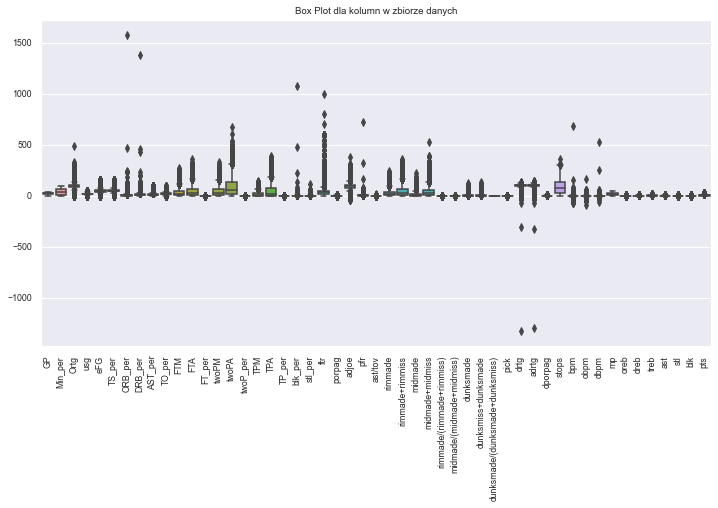

In [22]:
plt.figure(figsize=(12, 6))
sn.boxplot(data=total_ball_data)
plt.title("Box Plot dla kolumn w zbiorze danych")
plt.xticks(rotation=90)
plt.show()

Outliers

In [39]:
# Set the threshold for Z-score
z_score_threshold = 3

# Iterate over each column in the DataFrame
for column_name in total_ball_data_year.columns:
    # Check if the column contains numerical data
    if total_ball_data_year[column_name].dtype in [np.float64, np.int64]:
        # Calculate the Z-scores for each data point in the column
        z_scores = np.abs((total_ball_data_year[column_name] - total_ball_data_year[column_name].mean()) / total_ball_data_year[column_name].std())

        # Create a boolean mask indicating the outliers
        outliers_mask = z_scores > z_score_threshold

        # Remove the outliers from the DataFrame
        total_ball_data_outliers = total_ball_data_year[~outliers_mask]

In [40]:
total_ball_data

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,mp,oreb,dreb,treb,ast,stl,blk,pts
4589,32,64.0,108.3,18.1,53.0,53.33,2.3,5.9,14.6,14.1,33,62,0.532,70,134,0.522,36,100,0.360,0.9,1.4,26.5,1.915280,104.79200,2.7,1.999909,48.0,75.0,22.0,59.0,0.6400,0.3729,6.0,7.0,0.8571,0,100.8750,98.5761,2.636630,124.82700,2.282520,2.426980,-0.144461,27.3125,0.4688,1.3750,1.8438,2.1875,0.5938,0.2188,8.7812
4590,11,1.0,121.1,16.8,75.0,75.00,0.0,0.0,15.8,24.8,0,0,0.000,0,1,0.000,2,3,0.667,0.0,0.0,0.0,0.151246,116.46800,8.0,1.000000,0.0,0.0,0.0,1.0,0.0000,0.0000,0.0,0.0,0.0000,0,102.8780,101.9380,0.116247,1.58625,-3.890510,0.869061,-4.759570,1.3636,0.0000,0.0000,0.0000,0.0909,0.0000,0.0000,0.5455
4591,27,81.8,99.8,27.7,49.9,53.76,6.9,17.6,15.6,18.6,123,187,0.658,126,261,0.483,33,91,0.363,1.4,1.4,53.1,2.701770,108.31300,4.3,0.773810,82.0,134.0,44.0,127.0,0.6119,0.3465,3.0,4.0,0.7500,0,106.3010,110.6310,1.801420,168.42800,-0.441037,1.107340,-1.548380,32.7037,2.1481,4.9259,7.0741,2.4074,0.8148,0.4815,17.5556
4594,35,76.2,118.1,16.4,58.8,60.93,4.7,11.5,12.3,15.1,73,107,0.682,65,136,0.478,59,125,0.472,1.4,3.1,41.0,2.872460,111.67400,3.5,1.340383,47.0,78.0,19.0,58.0,0.6026,0.3276,13.0,15.0,0.8667,0,95.9093,98.0859,3.004560,215.85700,6.077490,3.665330,2.412160,30.6857,1.3429,3.2286,4.5714,1.8000,1.6571,0.4000,10.8571
4595,29,9.5,60.7,6.9,8.3,14.93,3.2,13.9,7.7,6.1,3,10,0.300,1,10,0.100,0,2,0.000,0.8,1.3,83.3,-0.591030,47.48430,3.9,5.997102,1.0,7.0,0.0,3.0,0.1429,0.0000,0.0,0.0,0.0000,0,99.0118,101.2860,0.402609,23.56570,-4.128490,-4.707080,0.578588,4.6207,0.1379,0.5862,0.7241,0.2069,0.1034,0.0345,0.1724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61047,13,11.0,99.1,15.1,60.0,55.37,10.2,21.2,3.8,22.4,4,12,0.333,15,25,0.600,0,0,0.000,1.6,0.8,48.0,0.529790,99.11170,3.6,0.375041,11.0,16.0,4.0,9.0,0.6875,0.4444,4.0,4.0,1.0000,0,101.2460,92.8631,1.315020,26.18760,0.620456,-0.393523,1.013980,11.2308,0.9231,1.9231,2.8462,0.2308,0.1538,0.1538,2.6154
61048,7,2.8,90.1,14.7,70.0,58.82,0.0,0.0,17.4,28.0,0,2,0.000,2,3,0.667,1,2,0.500,0.0,6.2,40.0,-0.047737,81.69370,5.7,1.000000,2.0,2.0,0.0,1.0,1.0000,0.0000,0.0,0.0,0.0000,0,107.7280,122.7820,0.059961,5.61526,-7.346540,-2.466690,-4.879850,4.0000,0.0000,0.0000,0.0000,0.2857,0.4286,0.0000,1.0000
61050,2,0.3,0.0,32.2,0.0,0.00,0.0,0.0,0.0,59.7,0,0,0.000,0,0,0.000,0,1,0.000,0.0,0.0,0.0,-0.475509,-6.10048,13.3,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0,108.3340,117.0980,0.052873,0.35037,-31.755600,-26.668400,-5.087270,1.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
61051,2,0.8,45.9,29.9,0.0,52.63,19.8,18.8,0.0,63.8,1,2,0.500,0,0,0.000,0,0,0.000,0.0,0.0,0.0,-0.389107,47.87760,13.3,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0,97.7465,101.1460,0.271806,1.03441,-25.175400,-18.498300,-6.677080,3.0000,0.5000,0.5000,1.0000,0.0000,0.0000,0.0000,0.5000


In [24]:
total_ball_data_outliers

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,mp,oreb,dreb,treb,ast,stl,blk,pts
4589,32,64.0,108.3,18.1,53.0,53.33,2.3,5.9,14.6,14.1,33,62,0.532,70,134,0.522,36,100,0.360,0.9,1.4,26.5,1.915280,104.79200,2.7,1.999909,48.0,75.0,22.0,59.0,0.6400,0.3729,6.0,7.0,0.8571,0,100.8750,98.5761,2.636630,124.82700,2.282520,2.426980,-0.144461,27.3125,0.4688,1.3750,1.8438,2.1875,0.5938,0.2188,8.7812
4590,11,1.0,121.1,16.8,75.0,75.00,0.0,0.0,15.8,24.8,0,0,0.000,0,1,0.000,2,3,0.667,0.0,0.0,0.0,0.151246,116.46800,8.0,1.000000,0.0,0.0,0.0,1.0,0.0000,0.0000,0.0,0.0,0.0000,0,102.8780,101.9380,0.116247,1.58625,-3.890510,0.869061,-4.759570,1.3636,0.0000,0.0000,0.0000,0.0909,0.0000,0.0000,0.5455
4591,27,81.8,99.8,27.7,49.9,53.76,6.9,17.6,15.6,18.6,123,187,0.658,126,261,0.483,33,91,0.363,1.4,1.4,53.1,2.701770,108.31300,4.3,0.773810,82.0,134.0,44.0,127.0,0.6119,0.3465,3.0,4.0,0.7500,0,106.3010,110.6310,1.801420,168.42800,-0.441037,1.107340,-1.548380,32.7037,2.1481,4.9259,7.0741,2.4074,0.8148,0.4815,17.5556
4594,35,76.2,118.1,16.4,58.8,60.93,4.7,11.5,12.3,15.1,73,107,0.682,65,136,0.478,59,125,0.472,1.4,3.1,41.0,2.872460,111.67400,3.5,1.340383,47.0,78.0,19.0,58.0,0.6026,0.3276,13.0,15.0,0.8667,0,95.9093,98.0859,3.004560,215.85700,6.077490,3.665330,2.412160,30.6857,1.3429,3.2286,4.5714,1.8000,1.6571,0.4000,10.8571
4595,29,9.5,60.7,6.9,8.3,14.93,3.2,13.9,7.7,6.1,3,10,0.300,1,10,0.100,0,2,0.000,0.8,1.3,83.3,-0.591030,47.48430,3.9,5.997102,1.0,7.0,0.0,3.0,0.1429,0.0000,0.0,0.0,0.0000,0,99.0118,101.2860,0.402609,23.56570,-4.128490,-4.707080,0.578588,4.6207,0.1379,0.5862,0.7241,0.2069,0.1034,0.0345,0.1724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61047,13,11.0,99.1,15.1,60.0,55.37,10.2,21.2,3.8,22.4,4,12,0.333,15,25,0.600,0,0,0.000,1.6,0.8,48.0,0.529790,99.11170,3.6,0.375041,11.0,16.0,4.0,9.0,0.6875,0.4444,4.0,4.0,1.0000,0,101.2460,92.8631,1.315020,26.18760,0.620456,-0.393523,1.013980,11.2308,0.9231,1.9231,2.8462,0.2308,0.1538,0.1538,2.6154
61048,7,2.8,90.1,14.7,70.0,58.82,0.0,0.0,17.4,28.0,0,2,0.000,2,3,0.667,1,2,0.500,0.0,6.2,40.0,-0.047737,81.69370,5.7,1.000000,2.0,2.0,0.0,1.0,1.0000,0.0000,0.0,0.0,0.0000,0,107.7280,122.7820,0.059961,5.61526,-7.346540,-2.466690,-4.879850,4.0000,0.0000,0.0000,0.0000,0.2857,0.4286,0.0000,1.0000
61050,2,0.3,0.0,32.2,0.0,0.00,0.0,0.0,0.0,59.7,0,0,0.000,0,0,0.000,0,1,0.000,0.0,0.0,0.0,-0.475509,-6.10048,13.3,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0,108.3340,117.0980,0.052873,0.35037,-31.755600,-26.668400,-5.087270,1.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
61051,2,0.8,45.9,29.9,0.0,52.63,19.8,18.8,0.0,63.8,1,2,0.500,0,0,0.000,0,0,0.000,0.0,0.0,0.0,-0.389107,47.87760,13.3,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0,97.7465,101.1460,0.271806,1.03441,-25.175400,-18.498300,-6.677080,3.0000,0.5000,0.5000,1.0000,0.0000,0.0000,0.0000,0.5000


In [42]:
y = ball_data.pick
ball_data_outliers = total_ball_data_outliers.loc[total_ball_data_outliers['year'] < 2021]
ball_data_outliers = ball_data_outliers.drop(['year'], axis=1)
ball_data_outliers_2021 = total_ball_data_outliers.loc[total_ball_data_outliers['year'] == 2021]
ball_data_outliers_2021 = ball_data_outliers_2021.drop(['year'], axis=1)
y_o = ball_data_outliers.pick

X = ball_data.loc[:,ball_data.columns!='pick']
X_o = ball_data_outliers.loc[:,ball_data_outliers.columns!='pick']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X_o, val_X_o, train_y_o, val_y_o = train_test_split(X_o, y_o, random_state=1)
print('Testing for 2020 and 2021 - Random Forest Model\n')
modelRF = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
modelRF.fit(train_X, train_y)
y_pred = modelRF.predict(val_X)
f1 = f1_score(val_y, y_pred)
print("Validation f1 score RF: {:,.3f}".format(f1))

test_X_2021 = ball_data_2021.loc[:,ball_data_2021.columns!='pick']
test_preds_2021 = modelRF.predict(test_X_2021)
f1 = f1_score(ball_data_2021.pick, test_preds_2021)
print("2021 Validation f1 score RF: {:,.5f}".format(f1))

modelRF.fit(train_X_o, train_y_o)
y_pred = modelRF.predict(val_X_o)
f1 = f1_score(val_y_o, y_pred)
print("Validation f1 score RF no outliers: {:,.3f}".format(f1))

test_X_2021 = ball_data_outliers_2021.loc[:,ball_data_outliers_2021.columns!='pick']
test_preds_2021 = modelRF.predict(test_X_2021)
f1 = f1_score(ball_data_outliers_2021.pick, test_preds_2021)
print("2021 Validation f1 score RF no outliers: {:,.5f}\n\n".format(f1))


print('Testing for 2020 and 2021 - XGBoost Model\n')
modelXGB = XGBClassifier(scale_pos_weight=(len(train_y) - sum(train_y)) / sum(train_y))
modelXGB.fit(train_X, train_y)
y_pred = modelXGB.predict(val_X)
f1 = f1_score(val_y, y_pred)
print("Validation f1 score XGB: {:,.3f}".format(f1))

test_X_2021 = ball_data_2021.loc[:,ball_data_2021.columns!='pick']
test_preds_2021 = modelXGB.predict(test_X_2021)
f1 = f1_score(ball_data_2021.pick, test_preds_2021)
print("2021 Validation f1 score XGB: {:,.5f}".format(f1))

modelXGB = XGBClassifier(scale_pos_weight=(len(train_y_o) - sum(train_y_o)) / sum(train_y_o))
modelXGB.fit(train_X_o, train_y_o)
y_pred = modelXGB.predict(val_X_o)
f1 = f1_score(val_y_o, y_pred)
print("Validation f1 score XGB no outliers: {:,.3f}".format(f1))

test_X_2021 = ball_data_outliers_2021.loc[:,ball_data_outliers_2021.columns!='pick']
test_preds_2021 = modelXGB.predict(test_X_2021)
f1 = f1_score(ball_data_outliers_2021.pick, test_preds_2021)
print("2021 Validation f1 score XGB no outliers: {:,.5f}\n\n".format(f1))


print('Testing for 2020 and 2021 - Logistic Regression Model\n')

model = LogisticRegression(solver='newton-cg', class_weight='balanced')
model.fit(train_X, train_y)
pred_test = model.predict(val_X)
f1_test = f1_score(val_y, pred_test)
print("Validation f1 score LR: {:,.3f}".format(f1_test))

test_X_2021 = ball_data_2021.loc[:,ball_data_2021.columns!='pick']
test_preds_2021 = model.predict(test_X_2021)
f1 = f1_score(ball_data_2021.pick, test_preds_2021)
print("2021 Validation f1 score LR: {:,.5f}".format(f1))

model.fit(train_X_o, train_y_o)
pred_test = model.predict(val_X_o)
f1_test = f1_score(val_y_o, pred_test)
print("The f1 score for the testing data LR no outliers: {:,.3f}".format(f1_test))

test_X_2021 = ball_data_outliers_2021.loc[:,ball_data_outliers_2021.columns!='pick']
test_preds_2021 = model.predict(test_X_2021)
f1 = f1_score(ball_data_outliers_2021.pick, test_preds_2021)
print("2021 Validation f1 score LR no outliers: {:,.5f}".format(f1))

Testing for 2020 and 2021 - Random Forest Model

Validation f1 score RF: 0.246
2021 Validation f1 score RF: 0.13764
Validation f1 score RF no outliers: 0.239
2021 Validation f1 score RF no outliers: 0.12416


Testing for 2020 and 2021 - XGBoost Model

Validation f1 score XGB: 0.424
2021 Validation f1 score XGB: 0.31655
Validation f1 score XGB no outliers: 0.471
2021 Validation f1 score XGB no outliers: 0.35714


Testing for 2020 and 2021 - Logistic Regression Model

Validation f1 score LR: 0.288
2021 Validation f1 score LR: 0.13611
The f1 score for the testing data LR no outliers: 0.276
2021 Validation f1 score LR no outliers: 0.12267


In [73]:
not_drafted = total_ball_data[total_ball_data['pick'] == 0]
not_drafted_sample = not_drafted.sample(n=1500)
drafted = total_ball_data[total_ball_data['pick'] == 1]

In [74]:
def  draw_boxplots_non_drafted(var):
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sn.boxplot(x=var, y="GP", data=not_drafted_sample)
    fig.axis(ymin=0, ymax=350)

In [75]:
def  draw_boxplots_drafted(var):
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sn.boxplot(x=var, y="GP", data=drafted)
    fig.axis(ymin=0, ymax=350)

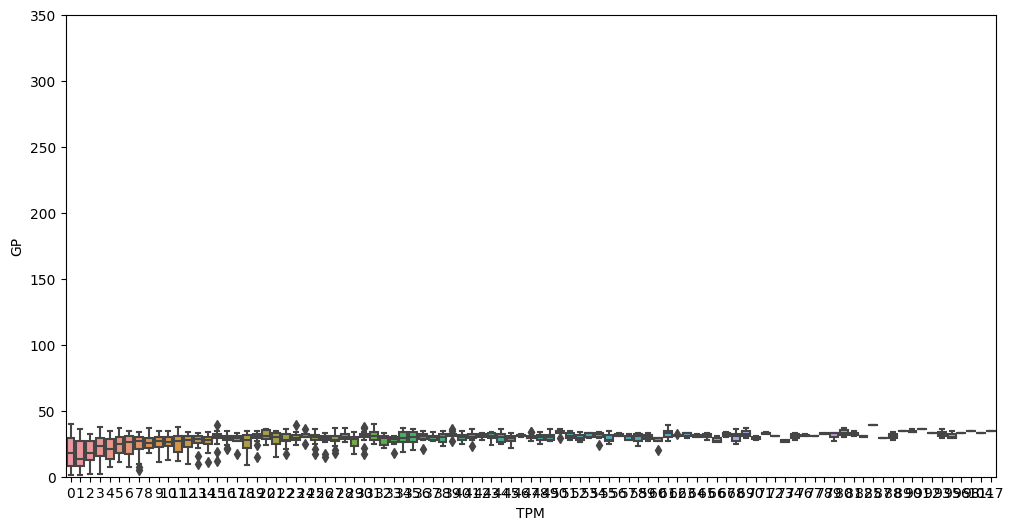

In [76]:
draw_boxplots_non_drafted('TPM')

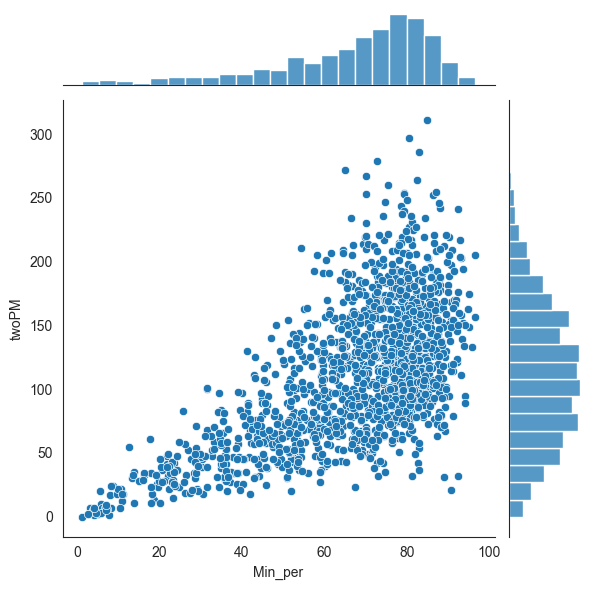

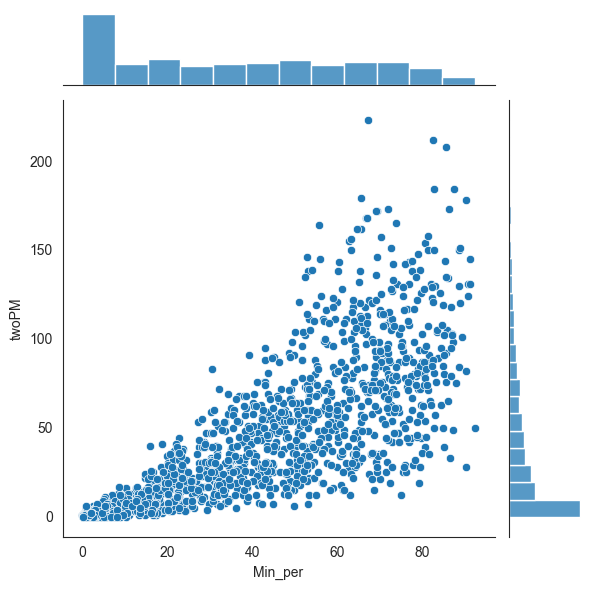

In [99]:
sn.jointplot(x= 'Min_per', y = 'twoPM', data=drafted)
sn.jointplot(x='Min_per', y='twoPM', data=not_drafted_sample)

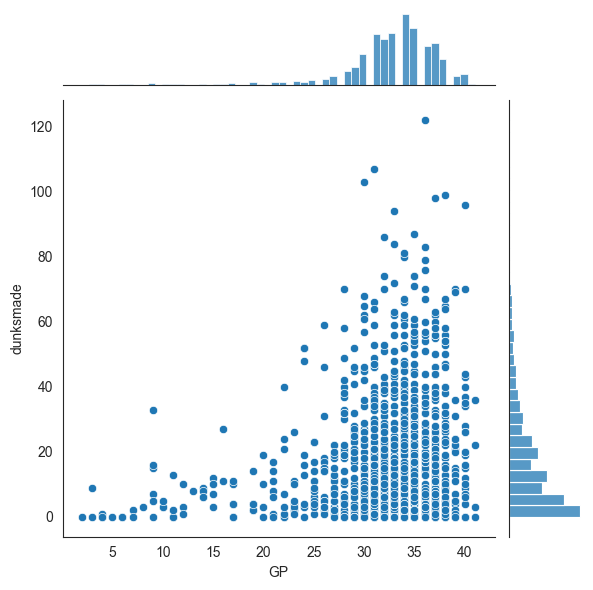

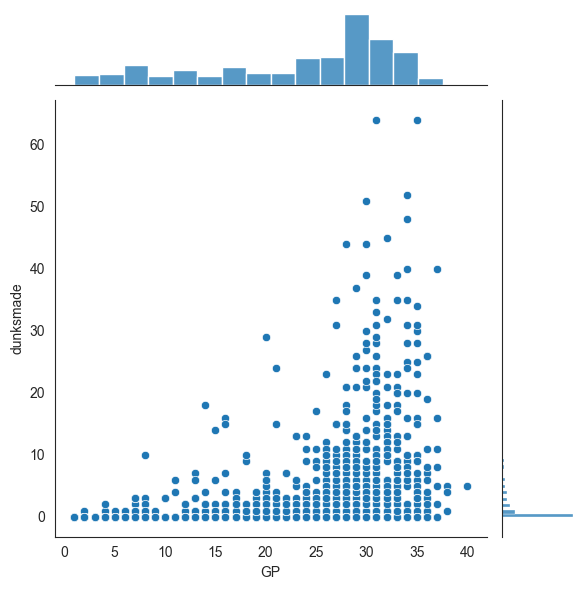

In [194]:
sn.jointplot(x= 'GP', y ='dunksmade', data=drafted)
sn.jointplot(x='GP', y='dunksmade', data=not_drafted_sample)

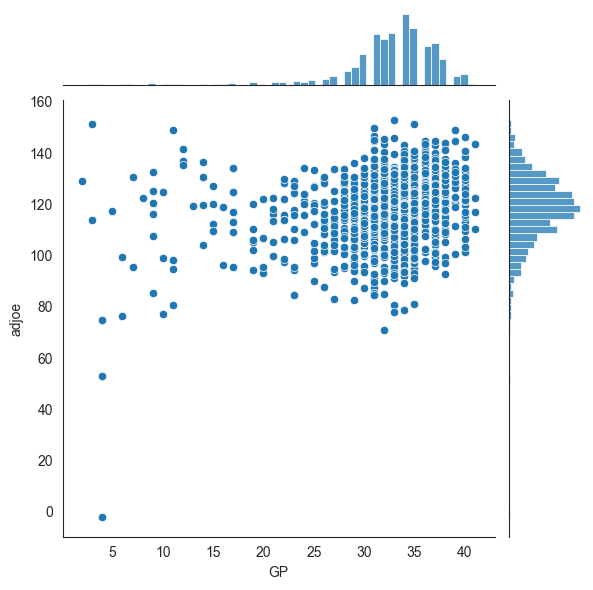

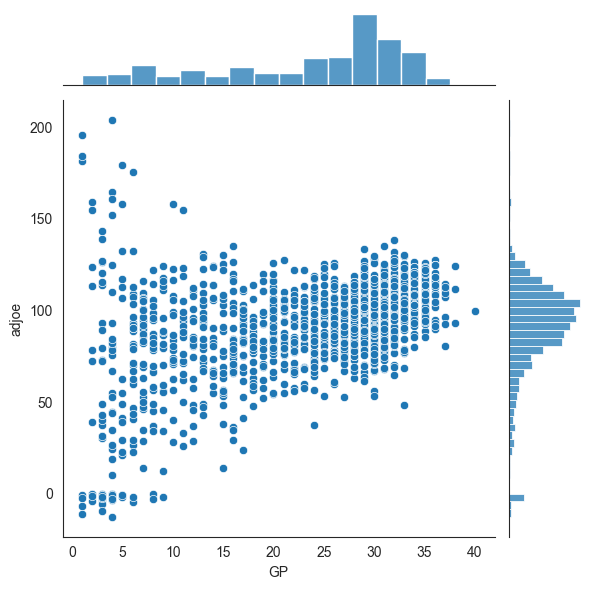

In [195]:
sn.jointplot(x= 'GP', y ='adjoe', data=drafted)
sn.jointplot(x='GP', y='adjoe', data=not_drafted_sample)

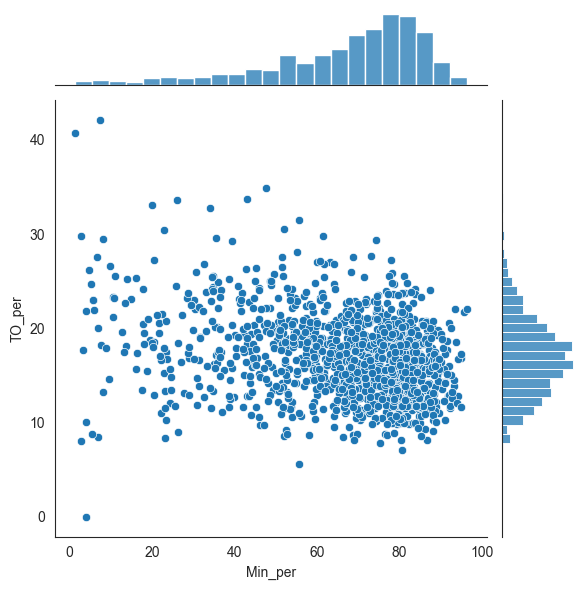

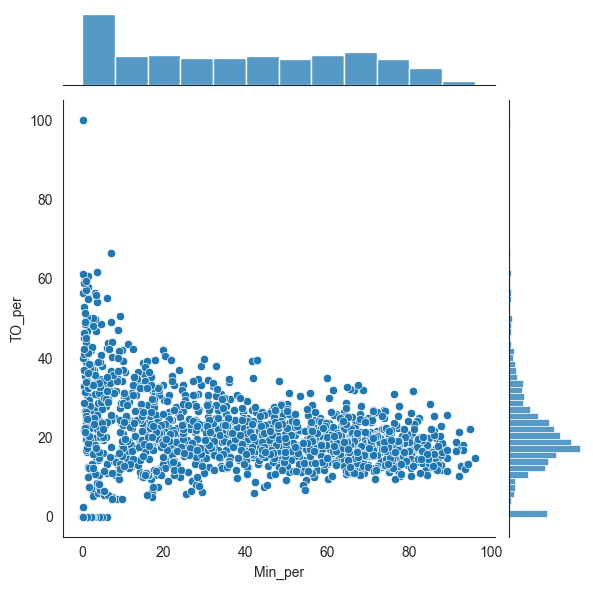

In [203]:
sn.jointplot(x= 'Min_per', y ='TO_per', data=drafted)
sn.jointplot(x='Min_per', y='TO_per', data=not_drafted_sample)

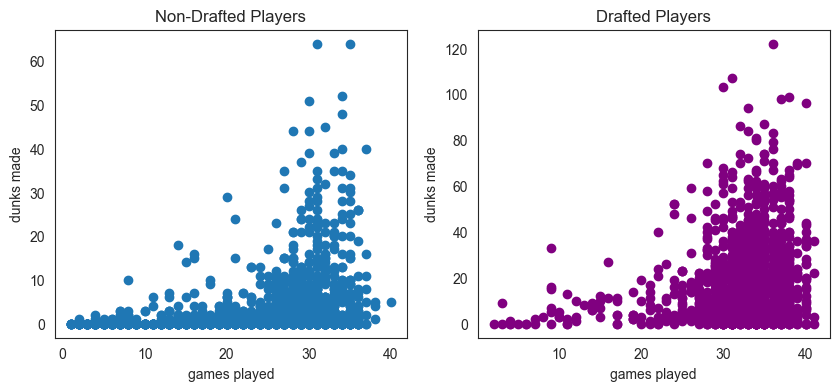

In [210]:
x1 = not_drafted_sample['GP']
y1 = not_drafted_sample['dunksmade']
x2 = drafted['GP']
y2 = drafted['dunksmade']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.scatter(x1, y1)
ax1.set(xlabel='games played',ylabel='dunks made', title='Non-Drafted Players')
ax2.scatter(x2, y2,c='purple')
ax2.set(xlabel='games played',ylabel='dunks made', title='Drafted Players')
#fig.suptitle('Two Scatter Plots')
plt.show()

In [220]:
drafted_players = drafted[(drafted['GP'] >= 30)]['TS_per']
n_drafted_players = not_drafted_sample[(not_drafted_sample['GP'] >= 30)]['TS_per']

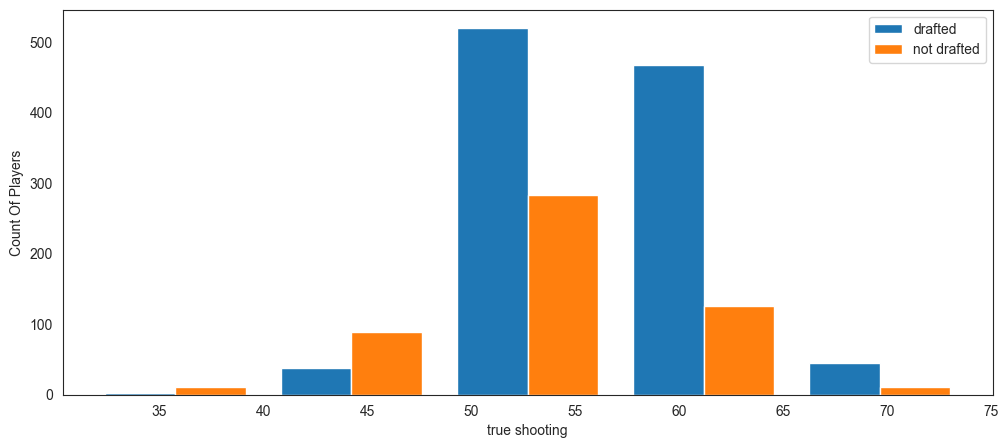

In [221]:
fig, axes = plt.subplots(figsize = (12,5))
labels = ['drafted', 'not drafted']
x = [drafted_players, n_drafted_players]
axes.hist(x, bins = 5, histtype='bar', stacked= False, label = labels)
plt.legend(labels)
plt.xlabel('true shooting')
plt.ylabel('Count Of Players')
plt.show()

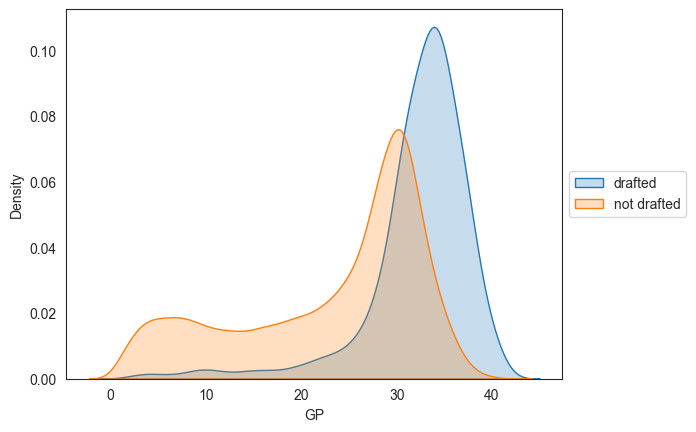

In [227]:
sn.kdeplot(total_ball_data[['GP', 'pick']][total_ball_data['pick'] == 1]['GP'], shade = True, label="drafted")
sn.kdeplot(total_ball_data[['GP', 'pick']][total_ball_data['pick'] == 0]['GP'], shade = True, label="not drafted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

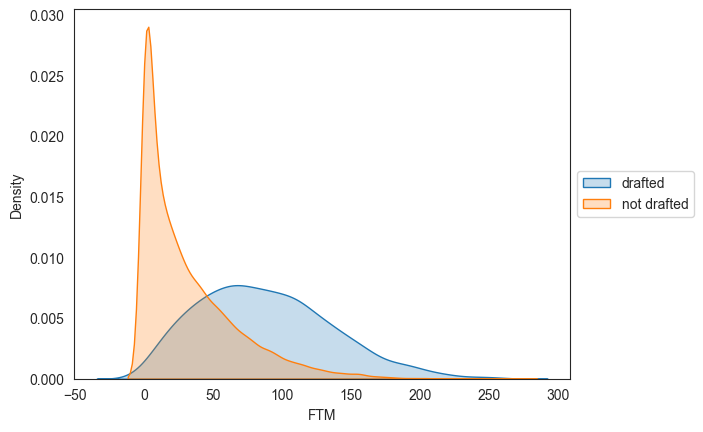

In [234]:
sn.kdeplot(total_ball_data[['FTM','pick']][total_ball_data['pick'] == 1]['FTM'], shade = True, label="drafted")
sn.kdeplot(total_ball_data[['FTM', 'pick']][total_ball_data['pick'] == 0]['FTM'], shade = True, label="not drafted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))